In [25]:
from paddleocr import PaddleOCR
import numpy as np

In [2]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2025/11/10 11:34:15] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\hp/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\hp/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_p

In [3]:
import cv2
from matplotlib import pyplot as plt

In [7]:
def pretraitement(image):
    import numpy as np
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.GaussianBlur(gray, (3,3), 0)
    
    thresh = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        25,
        10
    )

    if np.mean(thresh) < 127:
        thresh = cv2.bitwise_not(thresh)

    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_open)

    kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    processed = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel_close)

    return processed


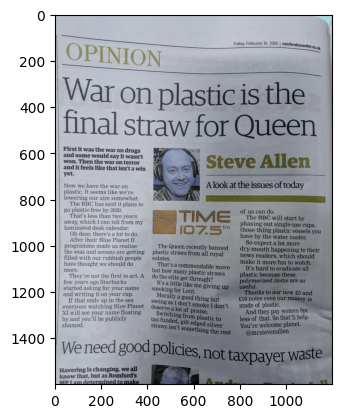

In [8]:
IMG_PATH = 'image\image.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)

plt.imshow(img)

In [9]:
processed_img = pretraitement(img)

result = ocr.ocr(processed_img , cls=True)
for line in result:
    print(line)

[2025/11/10 11:34:43] ppocr DEBUG: dt_boxes num : 75, elapsed : 0.3290224075317383
[2025/11/10 11:34:43] ppocr DEBUG: cls num  : 75, elapsed : 0.2750546932220459
[2025/11/10 11:34:55] ppocr DEBUG: rec_res num  : 75, elapsed : 11.744974374771118
[[[[50.0, 125.0], [464.0, 158.0], [458.0, 232.0], [43.0, 198.0]], ('OPINION', 0.9982909560203552)], [[[30.0, 266.0], [1095.0, 293.0], [1092.0, 423.0], [26.0, 396.0]], ('War on plastic is the', 0.9836437702178955)], [[[43.0, 414.0], [1143.0, 449.0], [1140.0, 551.0], [40.0, 516.0]], ('final straw for Queen', 0.9946597218513489)], [[[33.0, 570.0], [375.0, 579.0], [374.0, 607.0], [32.0, 598.0]], ('First it was the war on drugs', 0.9968096017837524)], [[[33.0, 598.0], [385.0, 607.0], [385.0, 634.0], [32.0, 625.0]], ("and some would sayIt wasn't", 0.9776352643966675)], [[[648.0, 607.0], [1101.0, 603.0], [1101.0, 667.0], [648.0, 670.0]], ('Steve Allen', 0.9650183320045471)], [[[35.0, 623.0], [372.0, 632.0], [371.0, 659.0], [34.0, 650.0]], ('won. Then t

In [10]:
for line in result:
    print(type(line[1][1]), line[1][1])


<class 'tuple'> ('War on plastic is the', 0.9836437702178955)


In [11]:
for item in result:
    print(item[1])


[[[30.0, 266.0], [1095.0, 293.0], [1092.0, 423.0], [26.0, 396.0]], ('War on plastic is the', 0.9836437702178955)]


In [12]:
from paddleocr import draw_ocr

In [13]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(IMG_PATH).convert('RGB')


boxes = []
texts = []
scores = []

for line in result[0]:
    box = line[0]
    text = line[1][0]
    score = line[1][1]

    boxes.append(box)
    texts.append(text)
    scores.append(score)


font = ImageFont.load_default()

im_show = draw_ocr(
    image, 
    boxes, 
    texts, 
    scores,
    drop_score=0.0, 
    font_path="C:/Windows/Fonts/BERNHC.TTF")

im_show = Image.fromarray(im_show)

im_show.save('result3.jpg')

print("Saved result.jpg")


Saved result.jpg


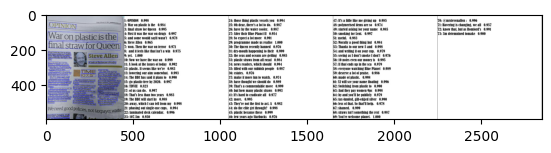

In [14]:
img = cv2.imread('result3.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)

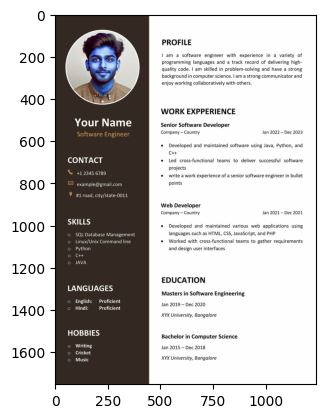

In [15]:
IMG_PATH = 'image\CV.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)

plt.imshow(img)

In [16]:
processed_img = pretraitement(img)

result = ocr.ocr(processed_img , cls=True)
for line in result:
    print(line)

[2025/11/10 11:35:12] ppocr DEBUG: dt_boxes num : 51, elapsed : 0.2732374668121338
[2025/11/10 11:35:12] ppocr DEBUG: cls num  : 51, elapsed : 0.2070448398590088
[2025/11/10 11:35:21] ppocr DEBUG: rec_res num  : 51, elapsed : 8.235170125961304
[[[[505.0, 113.0], [652.0, 117.0], [651.0, 156.0], [503.0, 151.0]], ('PROFILE', 0.9982804656028748)], [[[500.0, 185.0], [1172.0, 185.0], [1172.0, 210.0], [500.0, 210.0]], ('I am a software engineer with experience in a variety of', 0.983957827091217)], [[[502.0, 217.0], [1172.0, 214.0], [1172.0, 243.0], [502.0, 247.0]], ('programming languages and a track record of delivering high-.', 0.9927354454994202)], [[[506.0, 248.0], [1174.0, 248.0], [1174.0, 280.0], [506.0, 280.0]], ('quallty code. I am skllled in problem-solving and have a strong.', 0.9815738201141357)], [[[506.0, 285.0], [1172.0, 285.0], [1172.0, 311.0], [506.0, 311.0]], ('background in computer sclence. I am a strong communicator and', 0.9927296042442322)], [[[507.0, 318.0], [932.0, 31

In [17]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(IMG_PATH).convert('RGB')


boxes = []
texts = []
scores = []

for line in result[0]:
    box = line[0]
    text = line[1][0]
    score = line[1][1]

    boxes.append(box)
    texts.append(text)
    scores.append(score)


font = ImageFont.load_default()

im_show = draw_ocr(
    image, 
    boxes, 
    texts, 
    scores,
    drop_score=0.0, 
    font_path="C:/Windows/Fonts/BERNHC.TTF")

im_show = Image.fromarray(im_show)

im_show.save('result4.jpg')

print("Saved result.jpg")


Saved result.jpg


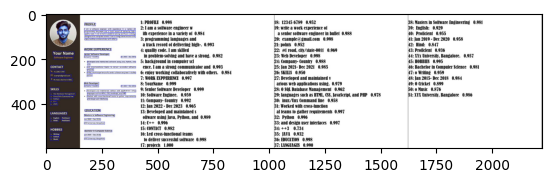

In [18]:
img = cv2.imread('result4.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)

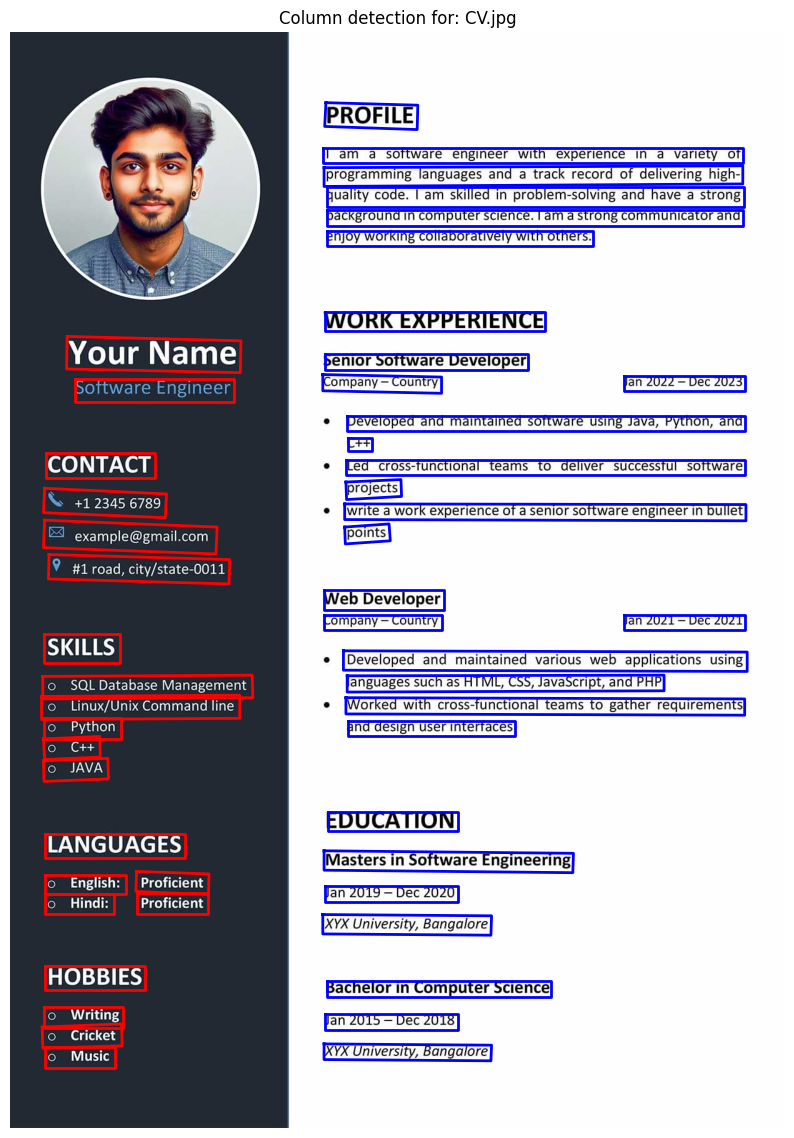

In [ ]:
import os
from sklearn.cluster import KMeans
import matplotlib.image as mpimg


if not result or result[0] is None:
    print(f"No text detected in image: {IMG_PATH}")
else:
    lines = result[0]

    x_centers = []
    for line in lines:
        if len(line) < 2:
            continue
        box = line[0]
        x_min = min([p[0] for p in box])
        x_max = max([p[0] for p in box])
        x_center = (x_min + x_max) / 2
        x_centers.append([x_center])

    if len(x_centers) >= 2:
        kmeans = KMeans(n_clusters=2, random_state=0).fit(x_centers)
        column_labels = kmeans.labels_
    else:
        column_labels = [0] * len(lines)

    img = mpimg.imread(IMG_PATH)
    plt.figure(figsize=(10, 15))
    plt.imshow(img)
    ax = plt.gca()

    colors = ['red', 'blue']

    for i, line in enumerate(lines):
        if len(line) < 2:
            continue
        box = line[0]
        x = [p[0] for p in box]
        y = [p[1] for p in box]
        ax.plot(x + [x[0]], y + [y[0]], color=colors[column_labels[i] % len(colors)], linewidth=2)

    plt.title(f"Column detection for: {os.path.basename(IMG_PATH)}")
    plt.axis('off')
    plt.show()

In [29]:
columns = {}
for i, line in enumerate(lines):
    if len(line) < 2:
        continue

    text = line[1][0]
    col = column_labels[i]

    if col not in columns:
        columns[col] = []

    y_pos = line[0][0][1]
    columns[col].append((y_pos, text))

for col in columns:
    columns[col] = sorted(columns[col], key=lambda x: x[0])

col_order = sorted(
    columns.keys(),
    key=lambda c: np.mean([
        (line[0][0][0] + line[0][2][0]) / 2
        for i, line in enumerate(lines)
        if column_labels[i] == c
    ])
)

script_folder = os.getcwd()  
output_path = os.path.join(script_folder, "output.txt")

with open(output_path, 'w', encoding='utf-8') as f:
    f.write("== EXTRACTED TEXT ==\n\n")
    for col_id, col_key in enumerate(col_order):
        f.write(f"Column {col_id + 1}:\n")
        for _, text in columns[col_key]:
            f.write("   " + text + "\n")
        f.write("\n")

print(f"Text successfully saved to: {output_path}")

Text successfully saved to: c:\Users\hp\Documents\GitHub\ocrDY\output.txt
